In [1]:
#Importar librerías
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import scipy.optimize as opt #Importar el módulo optimize de la librería scipy

In [2]:
def get_adj_closes(tickers,start_date=None, end_date=None):
    #Fecha de inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    #Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    #Unicamente necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    #Se ordenan de forma ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
#Descargar datos de emisoras 2020
emisoras = pd.read_csv('Emisoras2020.csv', header=0)
emisoras = np.array(emisoras).flatten()

In [5]:
#Descargar datos
# names = ['ALSEA.MX','CEMEXCPO.MX','GENTERA.MX']
start = '2010-01-01'

In [6]:
#importar datos
closes = get_adj_closes(emisoras,start_date=start)

In [52]:
import pickle

#Guardar resultados
#pickle.dump(closes,open('closes.sav','wb'))

#Cargar resultados
#closes = pickle.load(open('closes.sav', 'rb'))

In [8]:
# closes

In [9]:
#Delimitar datos
closes = closes[closes.index.year >= 2015]

In [10]:
#Seleccionar emisoras que contengan los suficientes datos
emisoras = [i for i in emisoras if closes[i].isnull().sum() < 2]

In [11]:
len(emisoras)

88

In [12]:
#Filtrar cierres de emisoras
closes = closes.loc[:,emisoras].dropna()
closes.head()

Symbols,AC.MX,ACCELSAB.MX,AEROMEX.MX,AGUA.MX,ALEATIC.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ANB.MX,...,SORIANAB.MX,TEAKCPO.MX,TLEVISACPO.MX,TMMA.MX,URBI.MX,VALUEGFO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,79.731155,9.3,19.389999,25.805101,22.313431,31.753469,18.269905,38.215240,13.928421,1669.947998,...,38.029999,15.8727,97.431053,4.93,1496.560059,93.781334,22.998337,33.985828,13.03,27.267859
2015-01-05,78.486710,9.3,20.030001,25.719084,22.054073,29.879787,17.154562,37.353245,13.773661,1602.017944,...,37.990002,15.4759,95.763977,4.80,1496.560059,96.460793,21.458525,33.985828,12.89,26.443434
2015-01-06,78.591141,9.3,19.570000,25.314804,22.434465,30.474607,17.065729,37.975796,13.704878,1602.017944,...,38.000000,15.7735,95.159546,4.80,1496.560059,98.896675,22.109037,32.052944,12.89,26.709375
2015-01-07,78.834808,9.3,19.430000,25.452431,22.979116,31.168564,17.045990,39.556126,13.859639,1602.017944,...,38.049999,15.4759,95.081551,4.60,1496.560059,98.896675,22.504282,33.733288,12.79,27.134884
2015-01-08,79.121986,9.3,20.840000,25.495438,23.376801,32.050880,17.312490,39.987122,14.126170,1602.017944,...,39.520000,15.4759,95.861481,4.65,1496.560059,98.896675,22.561922,33.733288,12.67,26.966455


In [13]:
#Rendimientos diarios
ret = closes.pct_change(1).dropna()
ret.head()

Symbols,AC.MX,ACCELSAB.MX,AEROMEX.MX,AGUA.MX,ALEATIC.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ANB.MX,...,SORIANAB.MX,TEAKCPO.MX,TLEVISACPO.MX,TMMA.MX,URBI.MX,VALUEGFO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.015608,0.0,0.033007,-0.003333,-0.011623,-0.059007,-0.061048,-0.022556,-0.011111,-0.040678,...,-0.001052,-0.024999,-0.017110,-0.026369,0.0,0.028571,-0.066953,0.000000,-0.010744,-0.030234
2015-01-06,0.001331,0.0,-0.022966,-0.015719,0.017248,0.019907,-0.005178,0.016667,-0.004994,0.000000,...,0.000263,0.019230,-0.006312,0.000000,0.0,0.025253,0.030315,-0.056873,0.000000,0.010057
2015-01-07,0.003100,0.0,-0.007154,0.005437,0.024277,0.022772,-0.001157,0.041614,0.011292,0.000000,...,0.001316,-0.018867,-0.000820,-0.041667,0.0,0.000000,0.017877,0.052424,-0.007758,0.015931
2015-01-08,0.003643,0.0,0.072568,0.001690,0.017306,0.028308,0.015634,0.010896,0.019231,0.000000,...,0.038633,0.000000,0.008203,0.010870,0.0,0.000000,0.002561,0.000000,-0.009382,-0.006207
2015-01-09,0.009019,0.0,-0.021113,0.004049,-0.009246,-0.011135,0.007982,-0.016527,0.012173,0.000000,...,-0.018219,0.000000,-0.001526,-0.012903,0.0,-0.019704,-0.006934,0.002591,0.000789,-0.016765


In [14]:
#Se siguen eliminando emisoras atípicas (no tan bursátiles)
emisoras = [i for i in emisoras if ret[i][ret[i]==0].count() < 300]
len(emisoras)

49

In [15]:
#Graficar emisoras bursatiles
#Filtrar cierres de emisoras
closes = closes.loc[:,emisoras].dropna()
closes.head()

Symbols,AC.MX,AEROMEX.MX,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ARA.MX,ASURB.MX,AUTLANB.MX,...,PE&OLES.MX,PINFRA.MX,RA.MX,SIMECB.MX,SORIANAB.MX,TLEVISACPO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,79.731155,19.389999,25.805101,31.753469,18.269905,38.215240,13.928421,5.736579,175.280350,13.843065,...,241.311752,156.201431,65.374748,41.611912,38.029999,97.431053,22.998337,33.985828,13.03,27.267859
2015-01-05,78.486710,20.030001,25.719084,29.879787,17.154562,37.353245,13.773661,5.674610,172.936203,13.549884,...,241.710968,151.798462,63.636158,39.530880,37.990002,95.763977,21.458525,33.985828,12.89,26.443434
2015-01-06,78.591141,19.570000,25.314804,30.474607,17.065729,37.975796,13.704878,5.656904,172.139557,13.549884,...,255.673569,148.484863,65.738846,40.053314,38.000000,95.159546,22.109037,32.052944,12.89,26.709375
2015-01-07,78.834808,19.430000,25.452431,31.168564,17.045990,39.556126,13.859639,5.763138,174.483704,13.576537,...,250.244629,154.667206,67.623085,40.549629,38.049999,95.081551,22.504282,33.733288,12.79,27.134884
2015-01-08,79.121986,20.840000,25.495438,32.050880,17.312490,39.987122,14.126170,5.754284,177.166641,13.594305,...,258.485596,154.984924,67.395523,40.331947,39.520000,95.861481,22.561922,33.733288,12.67,26.966455


In [16]:
#Rendimientos diarios
ret = closes.pct_change(1).dropna()
ret.head()

Symbols,AC.MX,AEROMEX.MX,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ARA.MX,ASURB.MX,AUTLANB.MX,...,PE&OLES.MX,PINFRA.MX,RA.MX,SIMECB.MX,SORIANAB.MX,TLEVISACPO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.015608,0.033007,-0.003333,-0.059007,-0.061048,-0.022556,-0.011111,-0.010802,-0.013374,-0.021179,...,0.001654,-0.028188,-0.026594,-0.050010,-0.001052,-0.017110,-0.066953,0.000000,-0.010744,-0.030234
2015-01-06,0.001331,-0.022966,-0.015719,0.019907,-0.005178,0.016667,-0.004994,-0.003120,-0.004607,0.000000,...,0.057766,-0.021829,0.033042,0.013216,0.000263,-0.006312,0.030315,-0.056873,0.000000,0.010057
2015-01-07,0.003100,-0.007154,0.005437,0.022772,-0.001157,0.041614,0.011292,0.018779,0.013618,0.001967,...,-0.021234,0.041636,0.028662,0.012391,0.001316,-0.000820,0.017877,0.052424,-0.007758,0.015931
2015-01-08,0.003643,0.072568,0.001690,0.028308,0.015634,0.010896,0.019231,-0.001536,0.015376,0.001309,...,0.032932,0.002054,-0.003365,-0.005368,0.038633,0.008203,0.002561,0.000000,-0.009382,-0.006207
2015-01-09,0.009019,-0.021113,0.004049,-0.011135,0.007982,-0.016527,0.012173,-0.004615,-0.018400,-0.000653,...,0.006108,0.007615,0.009860,0.000432,-0.018219,-0.001526,-0.006934,0.002591,0.000789,-0.016765


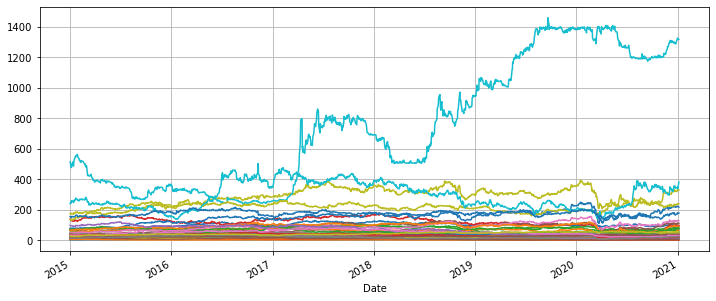

In [17]:
#Grafico de históricos diarios
closes.plot(figsize=(12,5), grid=True, legend=False)

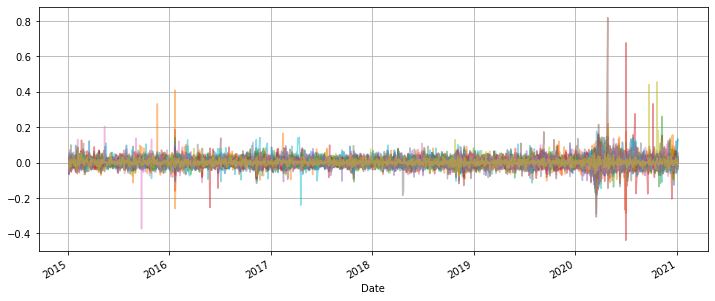

In [18]:
#Grafico de rendimientos diarios
ret.plot(figsize=(12,5), grid=True, alpha=0.5, legend=False)

In [19]:
#Resumen en base anual
annual_ret_summary = pd.DataFrame({'Mean':252*ret.mean(),'Volatility':np.sqrt(252)*ret.std()}, index=ret.columns)
annual_ret_summary = annual_ret_summary[annual_ret_summary['Mean']>0]
annual_ret_summary

,Mean,Volatility
Symbols,,
AC.MX,0.049736,0.211902
AGUA.MX,0.070545,0.331868
ALPEKA.MX,0.044854,0.312071
ALSEA.MX,0.000434,0.346387
AMXL.MX,0.043080,0.257560
ASURB.MX,0.147160,0.289366
AUTLANB.MX,0.015348,0.339734
AXTELCPO.MX,0.177159,0.389644
BACHOCOB.MX,0.076685,0.228857


In [20]:
#Delimitar a emisoras con rendimientos esperados positivos
emisoras = annual_ret_summary.index.values

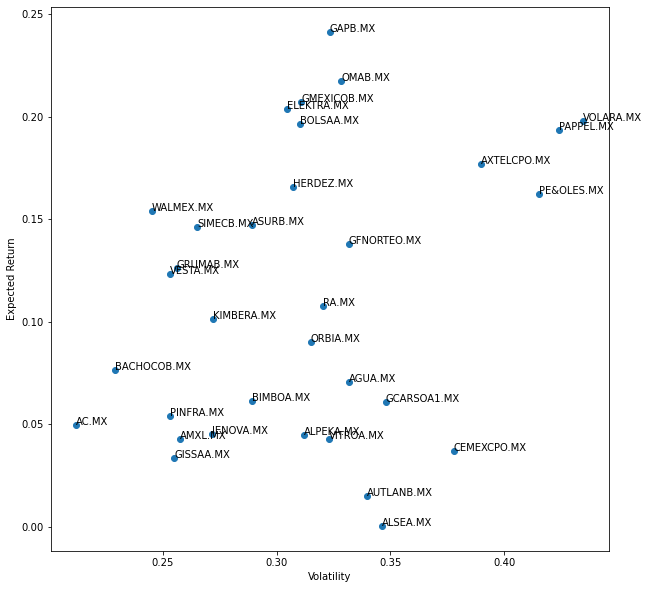

In [21]:
#Graficar rendimiento esperado vs volatilidad

#Puntos a graficar
x_points = annual_ret_summary.Volatility
y_points = annual_ret_summary.Mean

#Graficar
plt.figure(figsize=(10,10))
plt.plot(x_points,y_points,'o')
#Etiquetas de eje
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
#Etiquetas de instrumentos
for i in emisoras:
    plt.text(annual_ret_summary.loc[i,'Volatility'], annual_ret_summary.loc[i,'Mean'], i,rotation=0)
#plt.grid()

In [22]:
# Funcion objetivo y condicion inicial
def obj_fun(beta, Er, sigma):
    return ((Er - (beta[0]+beta[1]*sigma))**2).sum()

#beta_0 no es igual a beta[0]
beta_0 = [0,1]

In [23]:
# Resolver problema de optimizacion
solution = opt.minimize(obj_fun,beta_0, args=(y_points,x_points))
solution

      fun: 0.13590319860959746
 hess_inv: array([[ 0.5098323 , -1.5937282 ],
       [-1.5937282 ,  5.13456281]])
      jac: array([-0.00000000e+00,  1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.00150729,  0.36938268])

In [24]:
#Soluciones de la recta
beta = solution.x
beta

array([-0.00150729,  0.36938268])

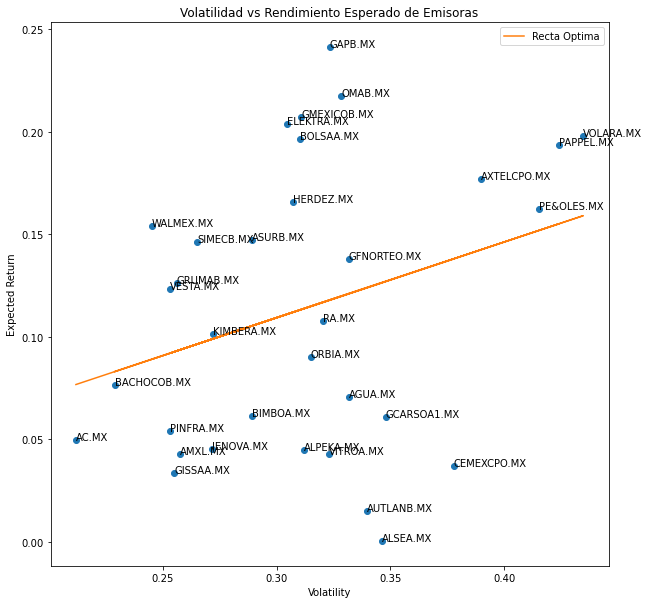

In [25]:
#Graficar rendimiento esperado vs volatilidad

#Puntos a graficar
x_points = annual_ret_summary.Volatility
y_points = annual_ret_summary.Mean

#Graficar
plt.figure(figsize=(10,10))
plt.title('Volatilidad vs Rendimiento Esperado de Emisoras')
plt.plot(x_points,y_points,'o')
#Etiquetas de eje
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
#Etiquetas de instrumentos
for i in emisoras:
    plt.text(annual_ret_summary.loc[i,'Volatility'], annual_ret_summary.loc[i,'Mean'], i,rotation=0)
# Grafico recta ajustada
plt.plot(x_points, beta[0]+beta[1] * x_points, label='Recta Optima')
plt.legend()
plt.show()

In [26]:
#Delimitar emisoras
opt = (y_points - (beta[0]+beta[1] * x_points))
emisoras = opt[opt > 0].index
emisoras

Index(['ASURB.MX', 'AXTELCPO.MX', 'BOLSAA.MX', 'ELEKTRA.MX', 'GAPB.MX',
       'GFNORTEO.MX', 'GMEXICOB.MX', 'GRUMAB.MX', 'HERDEZ.MX', 'KIMBERA.MX',
       'OMAB.MX', 'PAPPEL.MX', 'PE&OLES.MX', 'SIMECB.MX', 'VESTA.MX',
       'VOLARA.MX', 'WALMEX.MX'],
      dtype='object', name='Symbols')

In [27]:
#Graficar emisoras bursatiles
#Filtrar cierres de emisoras
closes = closes.loc[:,emisoras].dropna()
closes.head()

Symbols,ASURB.MX,AXTELCPO.MX,BOLSAA.MX,ELEKTRA.MX,GAPB.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,HERDEZ.MX,KIMBERA.MX,OMAB.MX,PAPPEL.MX,PE&OLES.MX,SIMECB.MX,VESTA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,
2015-01-02,175.280350,3.30,19.747761,514.071472,70.192474,68.033012,34.287163,137.111389,28.935154,23.184866,48.420582,24.570000,241.311752,41.611912,22.998337,13.03,27.267859
2015-01-05,172.936203,3.21,19.942509,481.764862,71.792656,66.108459,32.945915,132.684967,28.069136,22.890717,48.280357,24.139999,241.710968,39.530880,21.458525,12.89,26.443434
2015-01-06,172.139557,3.22,20.207371,477.936249,73.523613,65.469803,33.075977,136.150711,28.654972,23.275370,50.228695,24.340000,255.673569,40.053314,22.109037,12.89,26.709375
2015-01-07,174.483704,3.27,20.534555,477.068359,73.115883,66.885178,33.807568,133.591766,28.621012,23.192408,50.191803,24.180000,250.244629,40.549629,22.504282,12.79,27.134884
2015-01-08,177.166641,3.34,20.659195,491.534027,72.992798,67.894920,34.270897,138.224686,28.833275,23.592152,49.653046,24.160000,258.485596,40.331947,22.561922,12.67,26.966455


In [28]:
#Rendimientos diarios
ret = closes.pct_change(1).dropna()
ret.head()

Symbols,ASURB.MX,AXTELCPO.MX,BOLSAA.MX,ELEKTRA.MX,GAPB.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,HERDEZ.MX,KIMBERA.MX,OMAB.MX,PAPPEL.MX,PE&OLES.MX,SIMECB.MX,VESTA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,
2015-01-05,-0.013374,-0.027273,0.009862,-0.062845,0.022797,-0.028289,-0.039118,-0.032283,-0.029930,-0.012687,-0.002896,-0.017501,0.001654,-0.050010,-0.066953,-0.010744,-0.030234
2015-01-06,-0.004607,0.003115,0.013281,-0.007947,0.024111,-0.009661,0.003948,0.026120,0.020871,0.016804,0.040355,0.008285,0.057766,0.013216,0.030315,0.000000,0.010057
2015-01-07,0.013618,0.015528,0.016191,-0.001816,-0.005546,0.021619,0.022118,-0.018795,-0.001185,-0.003564,-0.000734,-0.006574,-0.021234,0.012391,0.017877,-0.007758,0.015931
2015-01-08,0.015376,0.021407,0.006070,0.030322,-0.001683,0.015097,0.013705,0.034680,0.007416,0.017236,-0.010734,-0.000827,0.032932,-0.005368,0.002561,-0.009382,-0.006207
2015-01-09,-0.018400,-0.011976,-0.016968,0.017148,-0.010750,-0.008516,0.004033,0.002858,-0.007951,-0.013108,0.003865,-0.000828,0.006108,0.000432,-0.006934,0.000789,-0.016765


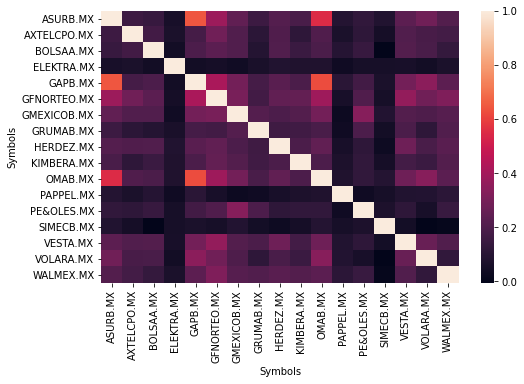

In [29]:
#Graficar las correlaciones entre los activos
corrcoef = ret.corr()
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corrcoef)

In [30]:
corrcoef

Symbols,ASURB.MX,AXTELCPO.MX,BOLSAA.MX,ELEKTRA.MX,GAPB.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,HERDEZ.MX,KIMBERA.MX,OMAB.MX,PAPPEL.MX,PE&OLES.MX,SIMECB.MX,VESTA.MX,VOLARA.MX,WALMEX.MX
Symbols,,,,,,,,,,,,,,,,,
ASURB.MX,1.000000,0.156782,0.141322,0.060402,0.643173,0.385758,0.247776,0.155764,0.215780,0.190375,0.550475,0.093390,0.128215,0.084820,0.236631,0.283810,0.214486
AXTELCPO.MX,0.156782,1.000000,0.170306,0.069617,0.177839,0.285750,0.208302,0.110966,0.204503,0.118875,0.205114,0.068417,0.120349,0.051117,0.210699,0.184199,0.173490
BOLSAA.MX,0.141322,0.170306,1.000000,0.043182,0.197197,0.233675,0.209831,0.091883,0.207954,0.152071,0.193213,0.097401,0.144096,-0.004237,0.213602,0.190834,0.133400
ELEKTRA.MX,0.060402,0.069617,0.043182,1.000000,0.045070,0.053725,0.039051,0.066304,0.085808,0.080395,0.078182,0.037395,0.057513,0.055013,0.061345,0.043678,0.069791
GAPB.MX,0.643173,0.177839,0.197197,0.045070,1.000000,0.417544,0.292855,0.178708,0.230994,0.193582,0.627115,0.106093,0.171337,0.067848,0.291503,0.346191,0.236177
GFNORTEO.MX,0.385758,0.285750,0.233675,0.053725,0.417544,1.000000,0.304957,0.170707,0.248839,0.251403,0.390773,0.059940,0.205653,0.057946,0.366726,0.282547,0.317881
GMEXICOB.MX,0.247776,0.208302,0.209831,0.039051,0.292855,0.304957,1.000000,0.216231,0.197818,0.211984,0.292421,0.028976,0.333384,0.086123,0.213249,0.201967,0.222996
GRUMAB.MX,0.155764,0.110966,0.091883,0.066304,0.178708,0.170707,0.216231,1.000000,0.162244,0.164736,0.188326,0.037263,0.196991,0.050614,0.192039,0.119033,0.209017
HERDEZ.MX,0.215780,0.204503,0.207954,0.085808,0.230994,0.248839,0.197818,0.162244,1.000000,0.195619,0.248905,0.059031,0.119904,0.034053,0.279024,0.190070,0.227482
